In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project

Data Source: https://github.com/shahinrostami/pokemon_dataset/blob/master/pokemon_gen_1_to_8.csv \
Github: https://github.com/damocardenas/DSCI235-Final

## Project Description
The video game of Pokemon is a video game about collecting and battling fictional creatures known as Pokemon. These video games have been coming every few years since 1996 and with each entry into this beloved franchise comes a new generation of pokemon to catch and battle. With 8 generations out and 9th generation being announced, I began to wonder how diverse each pokemon generation is? In the datatset I have selected, it details all 908 pokemon from all 8 generation since the first game since 1996. Each pokemon in thus dataset contains a pokedex number, the games have a type of encyclopedia for every pokemon, the type(s) it is, species, and how effective it is against other typings.

With all this information from the dataset I plan to answer the following questions in this notebook.

1. How many types are there for each generation of Pokemon?
    * How many Pokemon have dual typing (Pokemon with 2 typings) are there?
2. Understand how these Pokemon types change with each generation?
    * What type had the biggest increase each generation?
3. What Pokemon type is the most common in each generation and overall?

## Reading Data
I will start by getting the data from the source into the notebook so I can start seperating it, analyzing it and make my report

In [2]:
pokemon_dataset = pd.read_csv("https://raw.githubusercontent.com/shahinrostami/pokemon_dataset/master/pokemon_gen_1_to_8.csv")
pokemon_dataset.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


## Cleaning Data
Now that the data is imported and part of the notebook, I can now start manipulating it. I will first start by cleaning it up. There is a lot of columns with information that will not be useful for what I aim to analyze.

I will start by getting rid of unnecessary columns such as german_name, and its effectiveness against the different typings.

In [3]:
pokemon = pokemon_dataset.loc[:, 'pokedex_number':'type_2'].drop(
    columns=['german_name', 'japanese_name', 'status', 'species'])
pokemon.head()

,pokedex_number,name,generation,type_number,type_1,type_2
0,1,Bulbasaur,1,2,Grass,Poison
1,2,Ivysaur,1,2,Grass,Poison
2,3,Venusaur,1,2,Grass,Poison
3,3,Mega Venusaur,1,2,Grass,Poison
4,4,Charmander,1,1,Fire,NaN


Now that we cleaned up the data to only include information we need. We can now seperate the data into different dataframes for each generation and use the one we currently have as all pokemon from every generation. In told there is 8 generations of pokemon, so we will seperate the pokemon into 8 dataframes.

In [553]:
gen1 = pokemon.loc[pokemon['generation'] == 1]
gen2 = pokemon.loc[pokemon['generation'] == 2]
gen3 = pokemon.loc[pokemon['generation'] == 3]
gen4 = pokemon.loc[pokemon['generation'] == 4]
gen5 = pokemon.loc[pokemon['generation'] == 5]
gen6 = pokemon.loc[pokemon['generation'] == 6]
gen7 = pokemon.loc[pokemon['generation'] == 7]
gen8 = pokemon.loc[pokemon['generation'] == 8]

type_colors=['#A8B820', #BUG 3
             '#000000', #DARK 17
             '#7038F8', #DRAGON 14
             '#F8D030', #ELECTRIC 6
             '#EE99AC', #FAIRY 8
             '#C03028', #FIGHTING 9
             '#F08030', #FIRE 1
             '#2F60B5', #FLYING 16
             '#705898', #GHOST 12
             '#78C850', #GRASS 0
             '#E0C068', #GROUND 7
             '#98D8D8', #ICE 13
             '#A8A878', #NORMAL 4
             '#A040A0', #POISON 5
             '#F85888', #PSYCHIC 10
             '#B8A038', #ROCK 11
             '#9399A5', #STEEL 15
             '#6890F0', #WATER 2
            ]

## 1. How Many Types are there for Each Generation?

The first question I seek to answer is how many types are there for every generation. Every Pokemon came out during a generation and so every Pokemon has a generation. Many of the Pokemon have dual typing, and for those Pokemon, I will count them towards both of typings they represent. 

<BarContainer object of 18 artists>

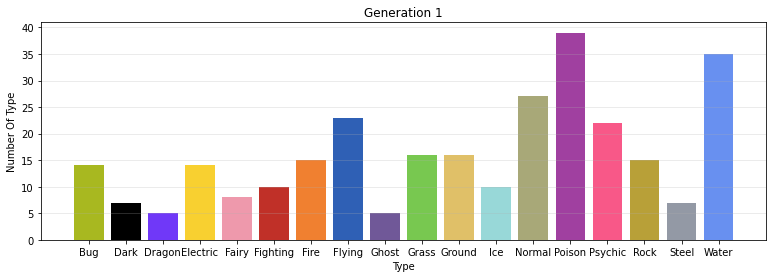

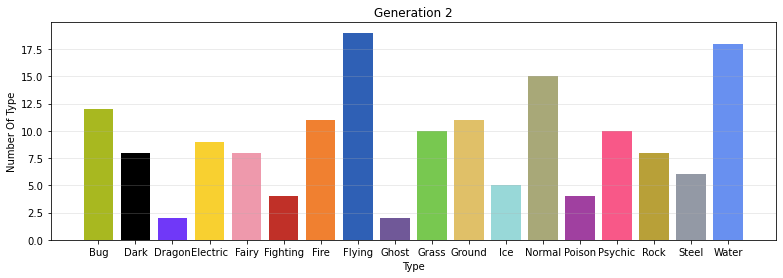

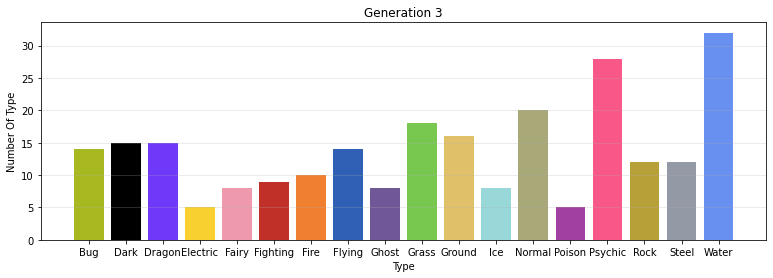

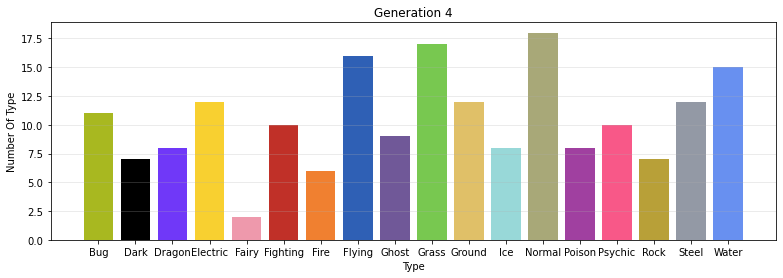

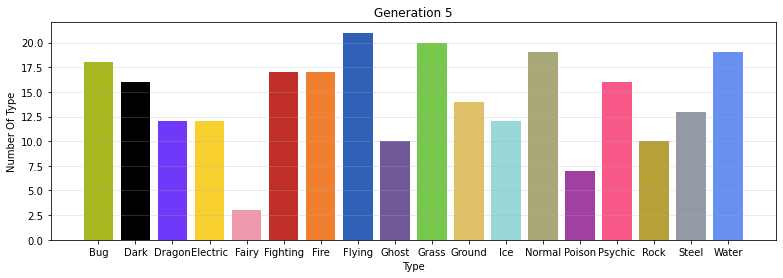

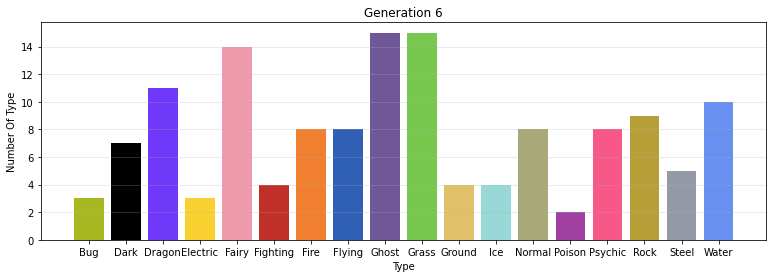

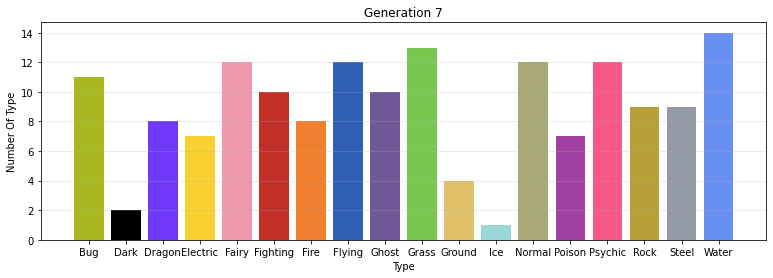

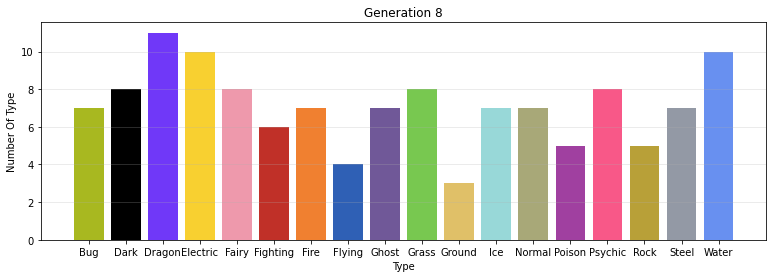

In [565]:
#Gen1
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 1")
plt.grid(axis = 'y', alpha=0.3)
typing = gen1['type_1'].value_counts().add(gen1['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen2
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 2")
plt.grid(axis = 'y', alpha=0.3)
typing = gen2['type_1'].value_counts().add(gen2['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen3
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 3")
plt.grid(axis = 'y', alpha=0.3)
typing = gen3['type_1'].value_counts().add(gen3['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen4
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 4")
plt.grid(axis = 'y', alpha=0.3)
typing = gen4['type_1'].value_counts().add(gen4['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen5
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 5")
plt.grid(axis = 'y', alpha=0.3)
typing = gen5['type_1'].value_counts().add(gen5['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen6
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 6")
plt.grid(axis = 'y', alpha=0.3)
typing = gen6['type_1'].value_counts().add(gen6['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen7
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 7")
plt.grid(axis = 'y', alpha=0.3)
typing = gen7['type_1'].value_counts().add(gen7['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

#Gen8
plt.figure(figsize=(13,4))
plt.xlabel("Type"), plt.ylabel('Number Of Type'), plt.title("Generation 8")
plt.grid(axis = 'y', alpha=0.3)
typing = gen8['type_1'].value_counts().add(gen8['type_2'].value_counts(), fill_value=0)
plt.bar(typing.index, typing, color=type_colors)

ANALYSIS OF ABOVE

### 1a. Dual Typing in Each Generation
Dual typing is something some of the Pokemon have. This is when a Pokemon has more than just one type associated with them. To calculate this, I will first find the number of dual types in each generation, then I will find how many of each type is there of this dual typing. But before I can find that, I need to swift through to find just Pokemon with dual typing.

In [621]:
gen = ['gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8']
count = [gen1[gen1['type_number'] == 2]['name'].count(),
         gen2[gen2['type_number'] == 2]['name'].count(),
         gen3[gen3['type_number'] == 2]['name'].count(),
         gen4[gen4['type_number'] == 2]['name'].count(),
         gen5[gen5['type_number'] == 2]['name'].count(),
         gen6[gen6['type_number'] == 2]['name'].count(),
         gen7[gen7['type_number'] == 2]['name'].count(),
         gen8[gen8['type_number'] == 2]['name'].count()]

dual_dict = {'Generation':gen, 'Count':count}
dual_types = pd.DataFrame(dual_dict)
dual_types

gen1[gen1['type_number'] == 2]['name'].count()

96

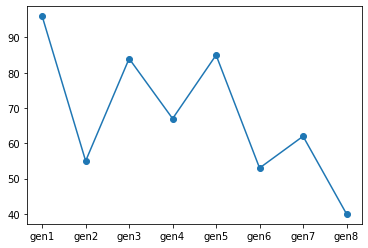

In [623]:
plt.figure()

plt.plot(dual_types['Generation'], dual_types['Count'], 'o-')

ANALYSIS